In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', delimiter=';')
df['hue']='red'
df2=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', delimiter=';')
df2['hue']='white'
df_wine = pd.concat([df, df2], ignore_index=True)
#print(df_wine.keys())
print(df_wine.shape)
df_wine

(6497, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,hue
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [5]:
X = df_wine
y = df_wine['hue']

In [7]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
print(X_train.shape)
print(X_test.shape)
print(X_train.size, X_test.size)

(5197, 13)
(1300, 13)
67561 16900


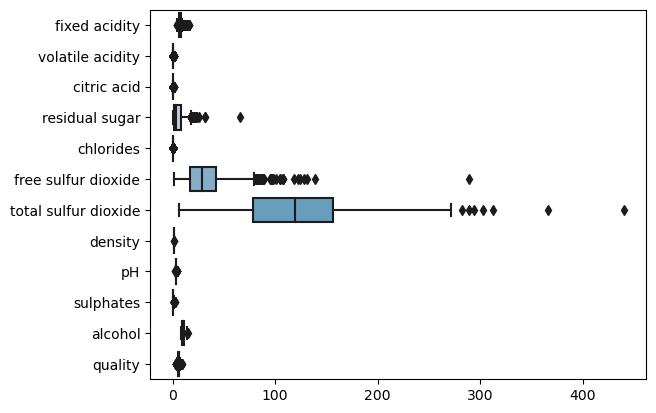

In [8]:
ax = sns.boxplot(data=X_train, orient="h", palette='PuBuGn')

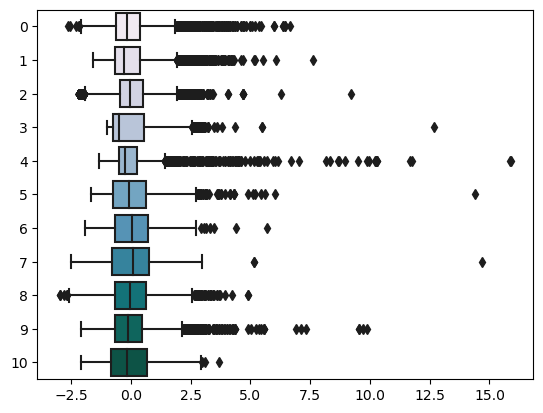

In [11]:
from sklearn.preprocessing import StandardScaler

X_train = X_train.drop(labels = ['quality', 'hue'], axis = 1)
X_test = X_test.drop(labels = ['quality', 'hue'], axis = 1)

# StandardScaler() scales the data. The fit_transform() module fits these new values to the data, 
# and stores them, replacing the old values.
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
ax = sns.boxplot(data=X_train, orient='h', palette='PuBuGn') # Apply PCA on the transformed (scaled and centered) data:

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5) # Using between 2-5 PCs

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
X_train.shape

(5197, 5)

# Now we're going to use seaborn to make the PCA graph. In this graph, similar datapoints should be closer together, forming a cluster. For this dataset we'd like to see white wine and red wine forming two separate clusters. (When making the scatterplot, the hue parameter corresponds with the color of the dots.)

<AxesSubplot:title={'center':'2 Component PCA'}, xlabel='Component 1', ylabel='Component 2'>

<Figure size 640x480 with 0 Axes>

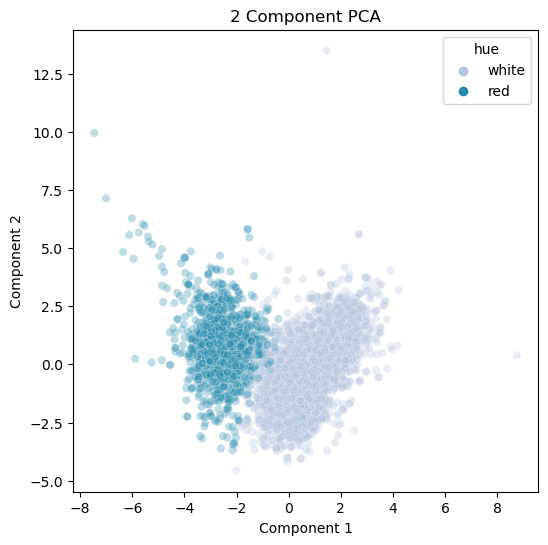

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

#print(X_train, y_train)
#pca_dataset = pd.DataFrame(data = X_train, columns = ['component1', 'component2'])
pca_dataset = pd.DataFrame(data = X_train) # Using this line to easily allow more PCs
pca_dataset['hue']=y_train.reset_index(drop=True) # Here must remove index for colors, otherwise Pandas reorganizes wine color data in dataframe
#print(pca_dataset)
plt.figure()
plt.figure(figsize=(6,6))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2 Component PCA')
#sns.scatterplot(x = pca_dataset['component1'], y = pca_dataset['component2'], hue=pca_dataset['hue'],
#                alpha=0.3,palette='PuBuGn')
sns.scatterplot(x = pca_dataset[0], y = pca_dataset[1], hue=pca_dataset['hue'], # Using this line to easily allow more PCs
                alpha=0.3,palette='PuBuGn')

In [14]:
# Trying to decipher the meaning of the principal components
print("Meaning of the 2 components:")
eigenvectors = pca.components_ # The eigenvectors
print(eigenvectors.shape)
pd.DataFrame(eigenvectors, columns=df_wine.keys().drop(labels = ['quality', 'hue']))

Meaning of the 2 components:
(5, 11)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.239850,-0.378601,0.147806,0.344812,-0.289520,0.433571,0.488749,-0.045997,-0.215840,-0.295267,-0.108741
1,0.335908,0.120606,0.183417,0.334376,0.311061,0.068348,0.086109,0.583883,-0.160638,0.190101,-0.464181
2,0.433327,-0.308044,0.594481,-0.161394,-0.019359,-0.127330,-0.102780,-0.175417,-0.451130,0.072860,0.266705
3,-0.170539,-0.222695,0.260216,-0.166693,0.250536,0.348339,0.208002,-0.067460,0.418388,0.640622,0.091952
4,0.145854,-0.152937,0.163360,0.340523,-0.615979,-0.228503,-0.149775,0.306440,0.467608,0.123362,0.175605


In [15]:
eigenvalues = pca.explained_variance_
print(pd.Series(eigenvalues))

0    3.043073
1    2.494307
2    1.556973
3    0.959543
4    0.725052
dtype: float64


5
   variance_ratio
1        0.276590
2        0.226712
3        0.141516
4        0.087214
5        0.065901


[Text(0.5, 0, 'Principal components'), Text(0, 0.5, 'Variance ratio')]

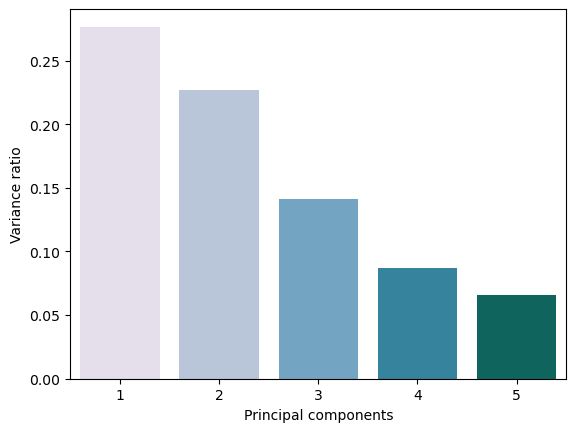

In [17]:
# How much does each component explain the original dataset.
print(len(pca.explained_variance_ratio_)) # Computed as eigenvalues/n_features
string = [s+1 for s in range(len(pca.explained_variance_ratio_))]
#string = ''.join(map(str, string)) # Convert
#print(string)
variance_ratio = pd.DataFrame(pca.explained_variance_ratio_, columns=['variance_ratio'], index=string)
print(variance_ratio.head())
ax = sns.barplot(data=variance_ratio, y='variance_ratio', x=variance_ratio.index, palette='PuBuGn')
ax.set(xlabel="Principal components", ylabel = "Variance ratio")

[Text(0.5, 0, 'Number of clusters, k'), Text(0, 0.5, 'Inertia')]

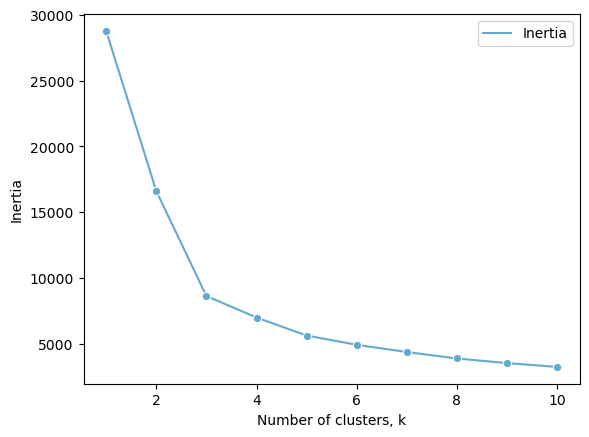

In [18]:
from sklearn.cluster import KMeans

inertia = []
# Creating 10 K-Mean models while varying the number of clusters (k)
# An elbow in the graph indicates the right number of clusters
for k in range(1,11):
    model = KMeans(n_clusters=k, init='k-means++')
    # Fit model to samples
    model.fit(pca_dataset.iloc[:,:2])   
    # Append the inertia to the list of inertias
    inertia.append(model.inertia_)
inertia = pd.DataFrame({'Inertia':inertia}, index=range(1,11))
ax = sns.lineplot(data=inertia, marker="o", palette='PuBuGn')
ax.set(xlabel='Number of clusters, k', ylabel='Inertia')

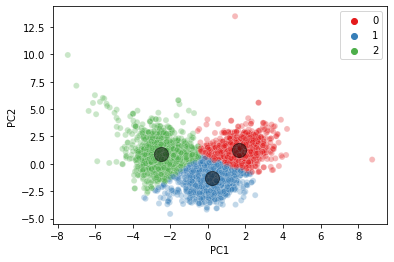

In [114]:
model = KMeans(n_clusters=3, init='k-means++')
model.fit(pca_dataset.iloc[:,:2]) # Cluster based on PC1 and PC2
labels = model.predict(pca_dataset.iloc[:,:2])
ax = sns.scatterplot(x = pca_dataset[0], y = pca_dataset[1], alpha=0.3, hue=labels, palette='Set1')
ax.set(xlabel='PC1', ylabel='PC2')
centers = model.cluster_centers_ # Get the cluster centroids
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5) # Plot centroids on top of clusters

regression

In [19]:
from sklearn.model_selection import train_test_split

In [21]:
X = df.drop(['quality', 'hue'], axis=1) 
y = df['hue']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=42)

In [31]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
548,12.4,0.350,0.49,2.6,0.079,27.0,69.0,0.99940,3.12,0.75,10.4
355,6.7,0.750,0.01,2.4,0.078,17.0,32.0,0.99550,3.55,0.61,12.8
1296,6.6,0.630,0.00,4.3,0.093,51.0,77.5,0.99558,3.20,0.45,9.5
209,11.0,0.300,0.58,2.1,0.054,7.0,19.0,0.99800,3.31,0.88,10.5
140,8.4,0.745,0.11,1.9,0.090,16.0,63.0,0.99650,3.19,0.82,9.6
...,...,...,...,...,...,...,...,...,...,...,...
1130,9.1,0.600,0.00,1.9,0.058,5.0,10.0,0.99770,3.18,0.63,10.4
1294,8.2,0.635,0.10,2.1,0.073,25.0,60.0,0.99638,3.29,0.75,10.9
860,7.2,0.620,0.06,2.7,0.077,15.0,85.0,0.99746,3.51,0.54,9.5
1459,7.9,0.200,0.35,1.7,0.054,7.0,15.0,0.99458,3.32,0.80,11.9


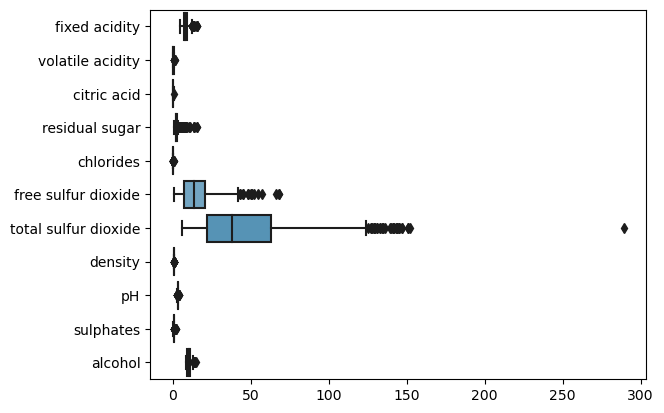

In [30]:
ax = sns.boxplot(data=X_train, orient='h', palette='PuBuGn')